In [1]:
%reload_ext autoreload
%autoreload 2

# import packages and modules
# data wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#io 
import os
import io
import glob
import scipy as sp
import scipy.io as sio
import skimage.io as skio

# image processing
import cv2
from PIL import Image

fig_save_path = os.path.normpath(r"Y:\laura_berkowitz\bmi\figures")
analysis_path = os.path.normpath(r"Y:\laura_berkowitz\bmi\analysis")


## Testing/development of functions 

### Explore data structure

In [42]:
basepath = os.path.normpath(r"Y:\Laurie\4.23.23\5aeq_WT")

# identify subfolder using glob
subfolders = glob.glob(basepath + '/*/')

with open(os.path.join(basepath,'5aeq_breath_4.23.23.bin'), mode='rb') as file: # b is important -> binary
    fileContent = file.read()


In [47]:
from bmi.utils import loading

# load tiff files as array in each subfolder, and concatenate in a pandas dataframe 
# for each subfolder, load tiff files as array
basepath = os.path.normpath(r"Y:\Laurie\4.23.23\5aeq_WT")

# identify subfolder using glob
subfolders = glob.glob(basepath + '/*/')
df = pd.DataFrame()
for sub in subfolders: 
    # get name of tiff files in subfolder
    tiff_files = glob.glob(os.path.join(sub,'**\*.tif'))
    # load metadata 
    meta = loading.load_metadata(sub)
    for file in tiff_files:
        # read in tiff files as array
        imstack1    = skio.imread(file)
        # flip every other frame
        imstack1[:, 1::2, ::-1, :] = imstack1[:, 1::2, :, :]
        # flatten 
        imstack1 = imstack1.flatten()
        
        # get metadata from file name
        
        

# concatenate arrays into a pandas dataframe
# add metadata to dataframe
# save dataframe as csv


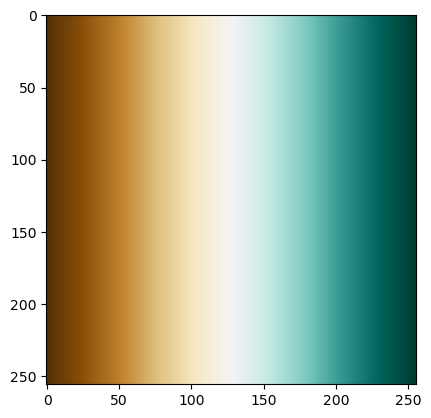

0.00392156862745098
0.00392156862745098


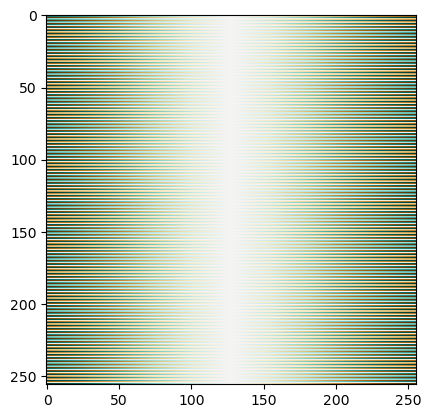

0.00392156862745098
0.996078431372549


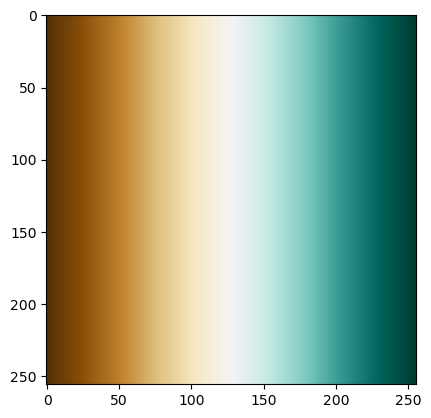

0.00392156862745098
0.00392156862745098


In [37]:
# Creates test data to mimic the bidirectional scanning 

# create a 256 x 256 matrix with increasing values from 0 to 1
matrix = np.zeros((256, 256))
for i in range(256):
    matrix[i] = np.linspace(0, 1, 256)

# create a 4D array with dimensions [21, 256, 256, 4]
array_4d = np.zeros((21, 256, 256, 4))

# populate the third dimension with the 256 x 256 matrix
array_4d[:, :, :, 0] = matrix
array_4d[:, :, :, 1] = matrix[::-1]
array_4d[:, :, :, 2] = matrix[:, ::-1]
array_4d[:, :, :, 3] = matrix[::-1, ::-1]

# show the first frame of the first channel, each row is 0 to 1
plt.imshow(array_4d[0, :, :, 0], cmap='BrBG')
plt.show()
# plot first cell of first second row of first channel
print (array_4d[0, 0, 1, 0])
print(array_4d[0, 1, 1, 0])

# flip every other frame
array_4d[:, 1::2, :, :] = array_4d[:, 1::2, ::-1, :]
plt.imshow(array_4d[0, :, :, 0], cmap='BrBG')
plt.show()
print (array_4d[0, 0, 1, 0])
print(array_4d[0, 1, 1, 0])

# flip every other frame back 
array_4d[:, 1::2, ::-1, :] = array_4d[:, 1::2, :, :]
plt.imshow(array_4d[0, :, :, 0], cmap='BrBG')
plt.show()
print (array_4d[0, 0, 1, 0])
print(array_4d[0, 1, 1, 0])

### Test index on real data

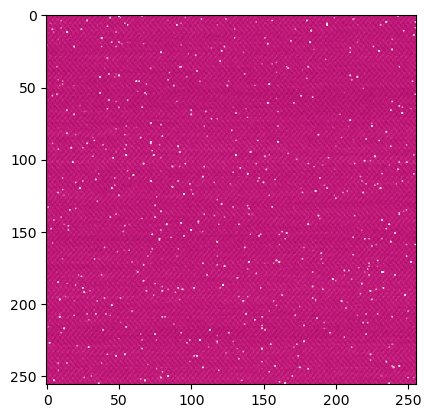

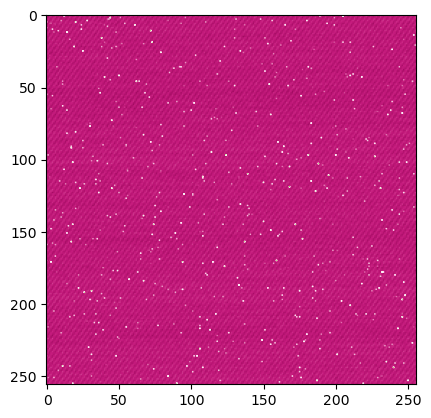

In [41]:
tiff_files = glob.glob(subfolders[0] + '**\*.tif')
imstack1    = skio.imread(tiff_files[0])
plt.imshow(imstack1[0, :, :, 0], cmap='PiYG')
plt.show()

# flip every other frame
imstack1[:, 1::2, ::-1, :] = imstack1[:, 1::2, :, :]
plt.imshow(imstack1[0, :, :, 0], cmap='PiYG')
plt.show()
